In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
uber = pd.read_csv("uber-raw-data-sep14.csv")
uber

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
uber.shape

(1028136, 4)

In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


In [8]:
#breaking the Date/Time column to "Day", "Hour", & "Weekday".
#changing the "Date/Time" column's data type from string to datetime
uber['Date/Time']= pd.to_datetime(uber['Date/Time']) 
uber

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764


In [10]:
# Break down the "Date/Time" column into "Day", "Hour", and "Weekday"
uber['Day'] = uber['Date/Time'].dt.day
uber['Hour'] = uber['Date/Time'].dt.hour
uber['Weekday'] = uber['Date/Time'].dt.weekday 
uber

,Date/Time,Lat,Lon,Base,Day,Hour,Weekday
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,22,1
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,22,1
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,22,1
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,22,1


In [11]:
# Check for missing or invalid values in Longitude and Latitude
print(uber[['Lon', 'Lat']].isnull().sum())

Lon    0
Lat    0
dtype: int64


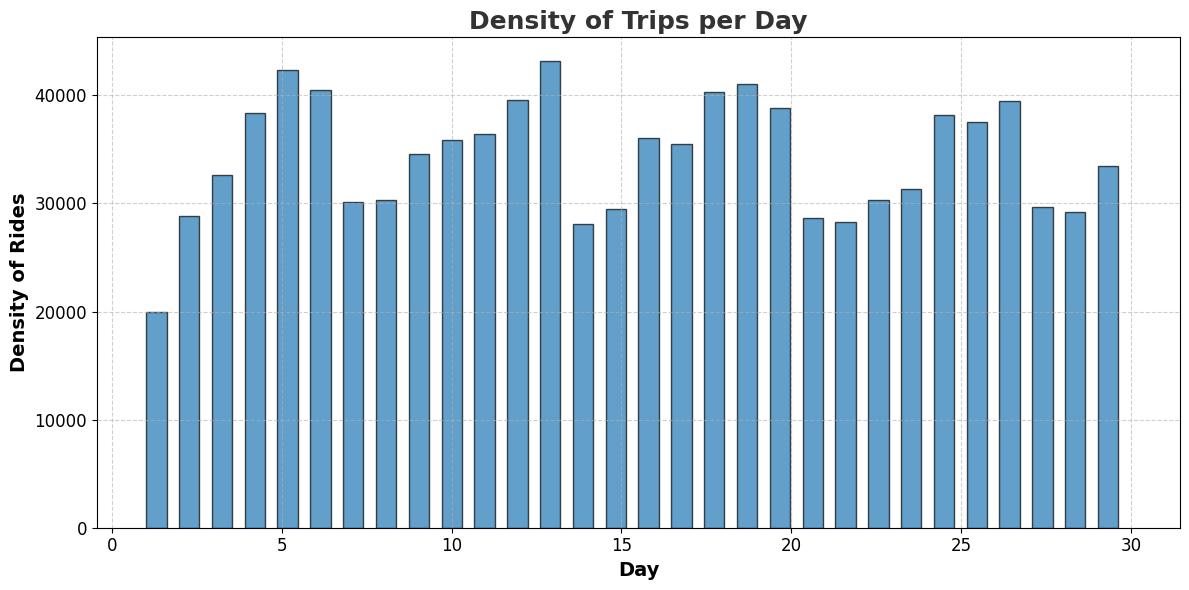

In [12]:
# Plot: Density of Trips per Day
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber.Day, width=0.6, bins=30, color='#1f77b4', edgecolor='black', alpha=0.7)
plt.title("Density of Trips per Day", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Day", fontsize=14, fontweight='bold')
plt.ylabel("Density of Rides", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

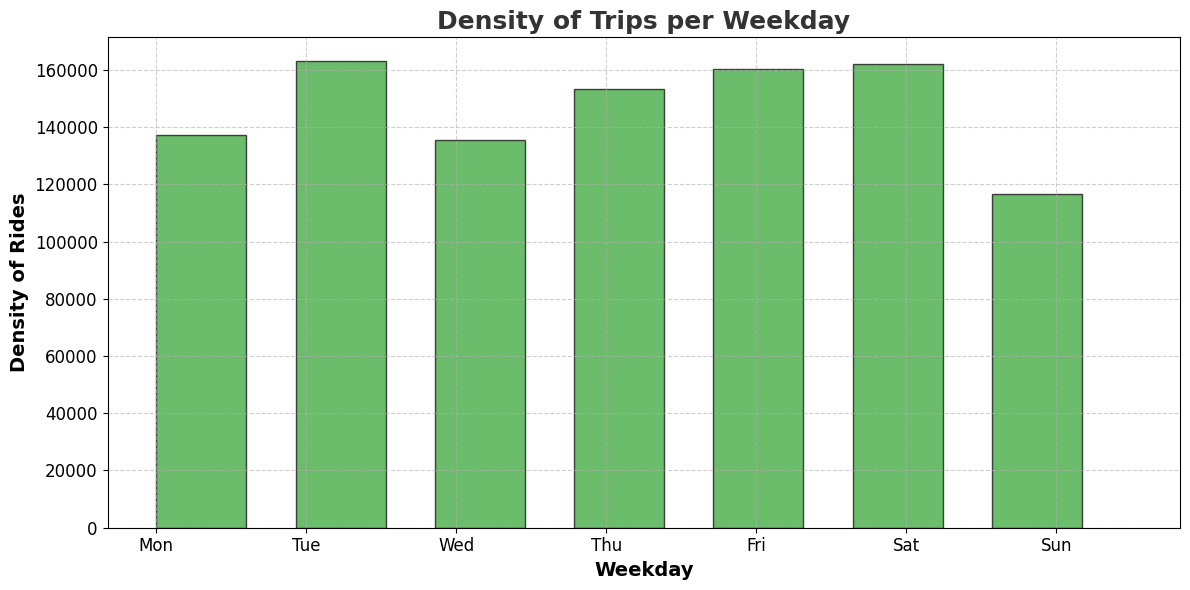

In [13]:
# Plot: Density of Trips per Weekday
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber.Weekday, width=0.6, range=(0, 6.5), bins=7, color='#2ca02c', edgecolor='black', alpha=0.7)
plt.title("Density of Trips per Weekday", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Weekday", fontsize=14, fontweight='bold')
plt.ylabel("Density of Rides", fontsize=14, fontweight='bold')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=12)
plt.yticks(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

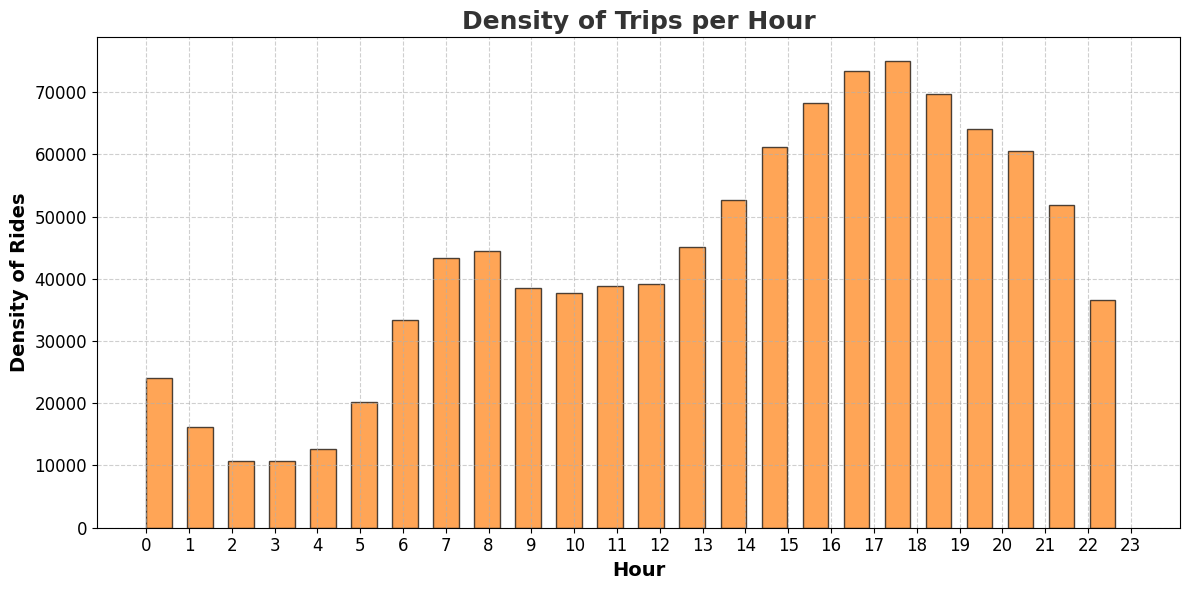

In [14]:
# Plot: Density of Trips per Hour
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber.Hour, width=0.6, bins=24, color='#ff7f0e', edgecolor='black', alpha=0.7)
plt.title("Density of Trips per Hour", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Hour", fontsize=14, fontweight='bold')
plt.ylabel("Density of Rides", fontsize=14, fontweight='bold')
plt.xticks(ticks=range(0, 24), fontsize=12)
plt.yticks(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Latitude')

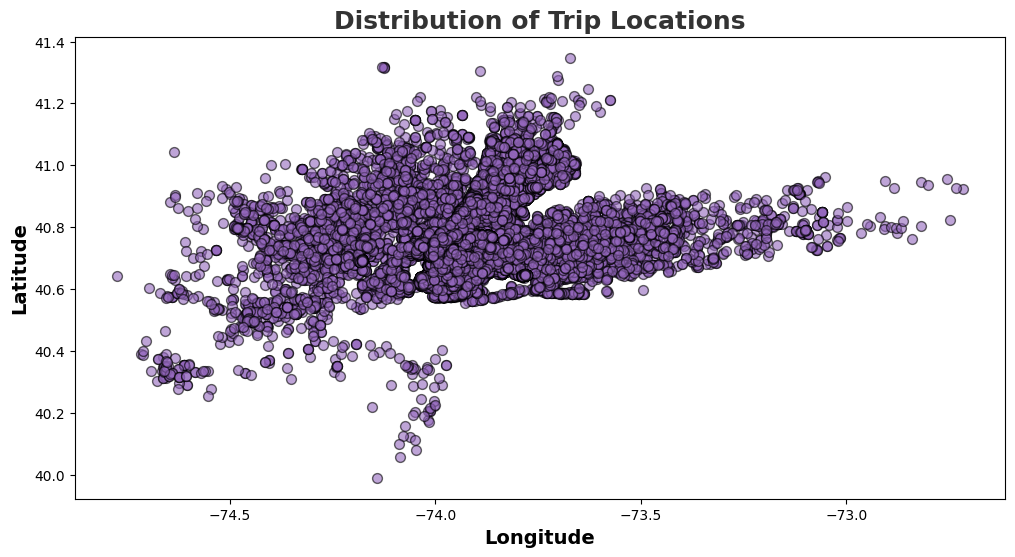

In [15]:
# Plot: Distribution of Trip Locations (Longitude vs Latitude)
fig, ax = plt.subplots(figsize=(12, 6))
x = uber.Lon
y = uber.Lat
plt.scatter(x, y, color='#9467bd', edgecolor='black', alpha=0.6, s=50)
plt.title("Distribution of Trip Locations", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Longitude", fontsize=14, fontweight='bold')
plt.ylabel("Latitude", fontsize=14, fontweight='bold')

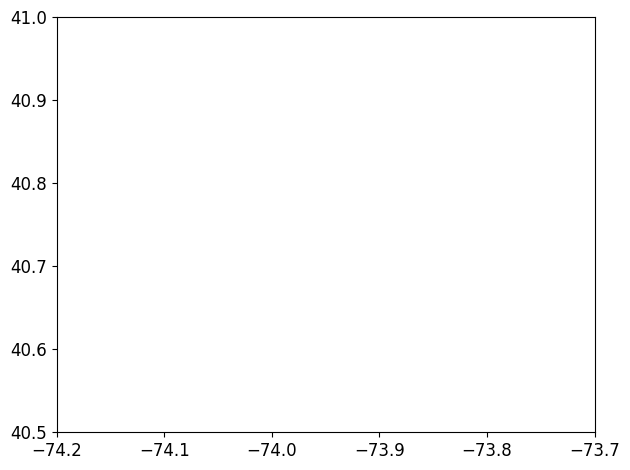

In [17]:
# Set x and y axis limits for better geographical accuracy (optional)
plt.xlim([-74.2, -73.7])  # New York region (optional)
plt.ylim([40.5, 41])      # New York region (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 